<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Supplied-Electricity-Data" data-toc-modified-id="Supplied-Electricity-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Supplied Electricity Data</a></span></li><li><span><a href="#Bulk-material-feed-data-(volume)" data-toc-modified-id="Bulk-material-feed-data-(volume)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Bulk material feed data (volume)</a></span></li><li><span><a href="#Bulk-materials-feeding-data-(time)" data-toc-modified-id="Bulk-materials-feeding-data-(time)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Bulk materials feeding data (time)</a></span></li><li><span><a href="#Data-about-supplied-gases-for-purging" data-toc-modified-id="Data-about-supplied-gases-for-purging-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data about supplied gases for purging</a></span></li><li><span><a href="#Temperature-measurement-results" data-toc-modified-id="Temperature-measurement-results-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Temperature measurement results</a></span></li><li><span><a href="#Wire-materials-data-(volume)" data-toc-modified-id="Wire-materials-data-(volume)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Wire materials data (volume)</a></span></li><li><span><a href="#Wire-material-data-(time)" data-toc-modified-id="Wire-material-data-(time)-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Wire material data (time)</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Handling-missing-values-and-removing-duplicates" data-toc-modified-id="Handling-missing-values-and-removing-duplicates-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Handling missing values and removing duplicates</a></span></li><li><span><a href="#Handling-anomalies" data-toc-modified-id="Handling-anomalies-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Handling anomalies</a></span></li><li><span><a href="#Adding-more-features" data-toc-modified-id="Adding-more-features-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Adding more features</a></span></li><li><span><a href="#Feature-aggregation-and-table-merging" data-toc-modified-id="Feature-aggregation-and-table-merging-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Feature aggregation and table merging</a></span></li><li><span><a href="#Data-split-and-model-training" data-toc-modified-id="Data-split-and-model-training-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Data split and model training</a></span></li><li><span><a href="#Model-Analysis" data-toc-modified-id="Model-Analysis-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Model Analysis</a></span></li><li><span><a href="#Checking-the-best-model-on-test-data" data-toc-modified-id="Checking-the-best-model-on-test-data-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Checking the best model on test data</a></span></li><li><span><a href="#Sanity-Check" data-toc-modified-id="Sanity-Check-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Sanity Check</a></span></li></ul></li><li><span><a href="#Report" data-toc-modified-id="Report-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Report</a></span></li></ul></div>

# Metallurgical Industry

To optimize production costs, the metallurgical plant "ABC Steel" LLC decided to reduce electricity consumption during the steel processing. We need to build a model that predicts the temperature of the steel.

Description of the process

Ladle furnace unit (LFU) - metallurgical equipment for out-of-furnace steel processing in the converter shop. The LFU is a large metal ladle with a volume of about 100 tons and is lined from the inside with refractory bricks. Molten steel is poured into the LFU from a steel ladle and then heated by graphite electrodes inserted into the unit's lid.

In addition to electric heating, desulfurization (removal of sulfur from the melt), adjustment of the chemical composition, and sampling are carried out at the CPC. Alloying of metal is carried out both with lumpy ferroalloys through the system to supply bulk materials from bunkers and with wire materials through a tube apparatus. Averaging the chemical composition and temperature is carried out through the bottom purge device in the steel ladle.

After completion of processing at the LFU, the melt is poured back into the steel ladle and either sent to other metal finishing units or to a continuous casting plant, where it solidifies in the form of metallurgical slabs.

Each time the melt enters the Ladle Furnace Unit, the initial temperature and chemical composition are measured. Then, if necessary, the melt is heated for several minutes, after which alloying materials are added, purged with a gas, stirring the melt, and measurements are again carried out following the approved Technological Instruction. This cycle is repeated several times until the target chemistry and melting temperature are reached. In this case, it is not necessary that the melt would be heated in each cycle.

**The purpose of the project:** To build a model for the regression problem that predicts the temperature of steel. MAE should be below 6.


Project Steps:

1. Exploratory data analysis.
2. Data preprocessing and model building.
3. Testing the best model and checking the model for adequacy.
4. Report

## Exploratory Data Analysis

<b> Importing the required libraries and reading the data </b>

In [1]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor
from sklearn.linear_model import ElasticNet, SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

RANDOM_STATE = 11122

In [2]:
warnings.filterwarnings("ignore")

In [3]:
try: 
    df_arc = pd.read_csv('data_arc.csv', index_col='key', parse_dates=[1, 2])
    df_bulk = pd.read_csv('data_bulk.csv', index_col='key')
    df_bulk_time = pd.read_csv('data_bulk_time.csv', index_col='key', parse_dates=list(range(1, 16)))
    df_gas = pd.read_csv('data_gas.csv', index_col='key')
    df_temp = pd.read_csv('data_temp.csv', index_col='key', parse_dates=[1])
    df_wire = pd.read_csv('data_wire.csv', index_col='key')
    df_wire_time = pd.read_csv('data_wire_time.csv', index_col='key', parse_dates=list(range(1, 10)))
except:
    'ERROR'

So, we have six tables with data: tables with data on electrodes, tables with data on the supply of bulk materials (volume and time), a table with data on gas purge of the alloy, tables with results of temperature measurements and tables with data on the supply of wire materials (volume and time).


The data consists of files obtained from various sources

* `data_arc.csv` - information on the supplied electricity;
* `data_bulk.csv` - data on the supply of bulk materials (volume);
* `data_bulk_time.csv` - data on the time of bulk delivery;
* `data_gas.csv` - data on supplied gases for purging;
* `data_temp.csv` - temperature measurement results;
* `data_wire.csv` - data on wire materials (volume);
* `data_wire_time.csv` - data about wire recoil time.

In all files, the key column contains the batch number. There can be several rows in the files with the same key value: they correspond to different processing iterations.

Let's write a function for creating a histogram and a boxplot.

In [4]:
def graph(data):
    _, [axs_hist, axs_box] = plt.subplots(2, 1,
                                         figsize=(15, 9), 
                                         sharex=True,
                                         gridspec_kw=dict(height_ratios=[10,1]))
    hist = sns.histplot(data=data, kde=True, ax=axs_hist)
    box = sns.boxplot(data=data, x=data, orient='h', ax=axs_box)
    hist.set(title=f'Histogram of {data.name}',
             ylabel='Number of records')
    box.set(xlabel=f'{data.name}');

In [5]:
def hist(data):
    plt.figure(figsize=(14,8))
    sns.histplot(data=data, discrete=True).set(title=f'Histogram of {data.name}')
    plt.show()

### Supplied Electricity Data

In [6]:
df_arc.head(5)

,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
key,,,,
1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [7]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14876 entries, 1 to 3241
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Начало нагрева дугой  14876 non-null  datetime64[ns]
 1   Конец нагрева дугой   14876 non-null  datetime64[ns]
 2   Активная мощность     14876 non-null  float64       
 3   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 581.1 KB


First, let's rename the columns for our convenience.

In [8]:
df_arc = df_arc.rename(columns={'Начало нагрева дугой': 'start_heating', 
                                'Конец нагрева дугой': 'end_heating',
                                'Активная мощность': 'active_power',
                                'Реактивная мощность': 'reactive_power'}
                      )

In [9]:
df_arc.describe()

,active_power,reactive_power
count,14876.000000,14876.000000
mean,0.670441,0.452592
std,0.408159,5.878702
min,0.030002,-715.504924
25%,0.395297,0.290991
50%,0.555517,0.415962
75%,0.857034,0.637371
max,3.731596,2.676388


In [10]:
df_arc.isna().sum()

start_heating     0
end_heating       0
active_power      0
reactive_power    0
dtype: int64

In [11]:
df_arc.duplicated().sum()

0

There are no missing or duplicate values in the electrode data table.

Let's see the number of unique keys in the electrode data table.

In [12]:
df_arc.index.nunique()

3214

The table contains 3214 unique batches. Let's look at the distribution of the number of heating iterations.

In [13]:
df_arc.index.value_counts()

2108    16
1513    15
1689    15
2567    14
46      13
        ..
112      1
2472     1
2025     1
3059     1
1615     1
Name: key, Length: 3214, dtype: int64

Batch numbers are repeated from 1 to 16 times (in the case of lot 2108).

Let's make histograms of the distribution of the time of the beginning and end of heating by the arc.

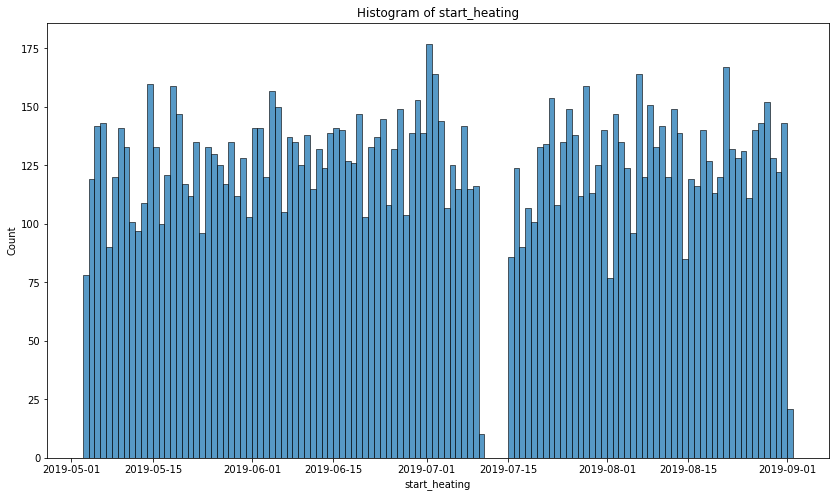

In [14]:
hist(df_arc['start_heating'])

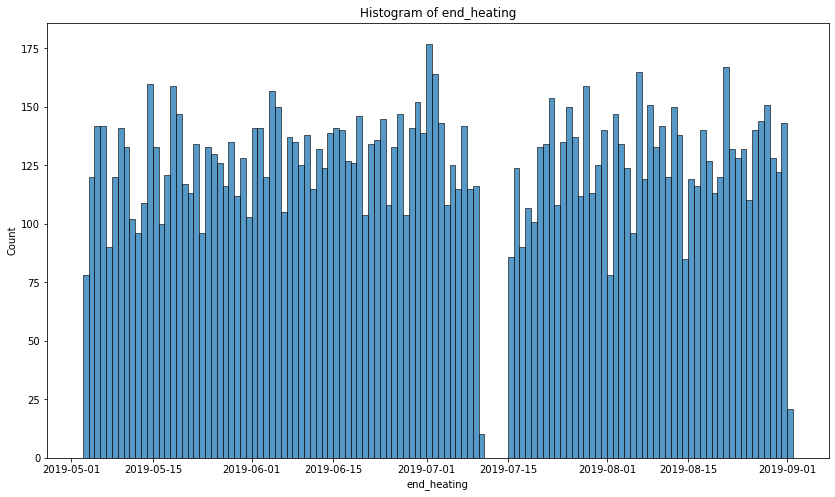

In [15]:
hist(df_arc['end_heating'])

The arc heating time columns contain data for the period from May to September 2019. We can also notice that there is no data for the period from July 11 to July 13. Most likely these days there was a breakdown of the equipment, or preventive maintenance was carried out.

Now let's look at the distribution of active and reactive powers.

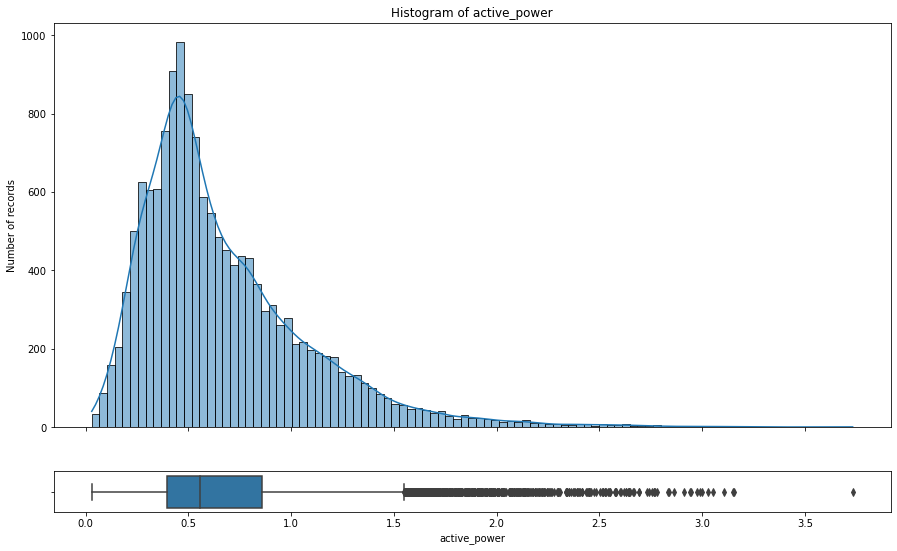

In [16]:
graph(df_arc['active_power'])

In [17]:
df_arc['active_power'].describe()

count    14876.000000
mean         0.670441
std          0.408159
min          0.030002
25%          0.395297
50%          0.555517
75%          0.857034
max          3.731596
Name: active_power, dtype: float64

`Active power` distribution is skewed to the right due to outliers. The average active power is 0.67, the standard deviation is 0.41.

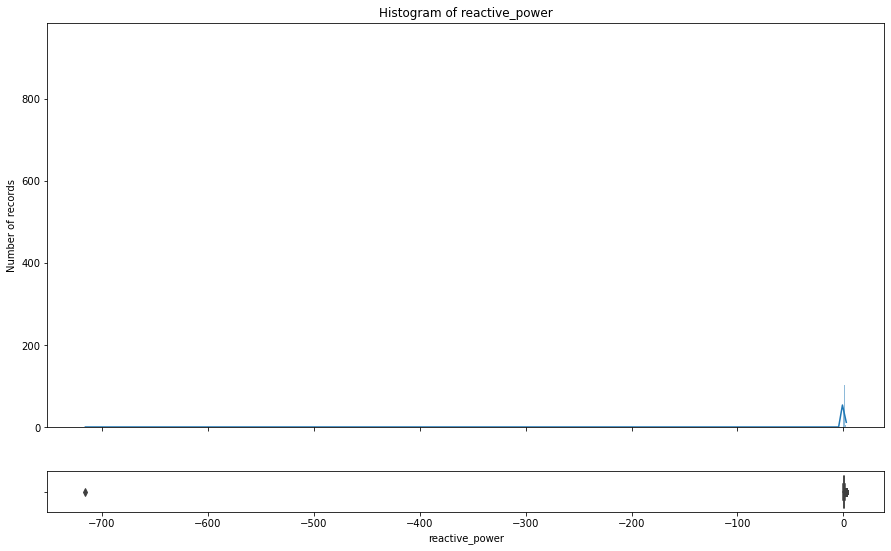

In [18]:
graph(df_arc['reactive_power'])

There is an outlier with a negative value in the data, which makes the distribution plot unreadable. Let's try to create a graph without the outlier.

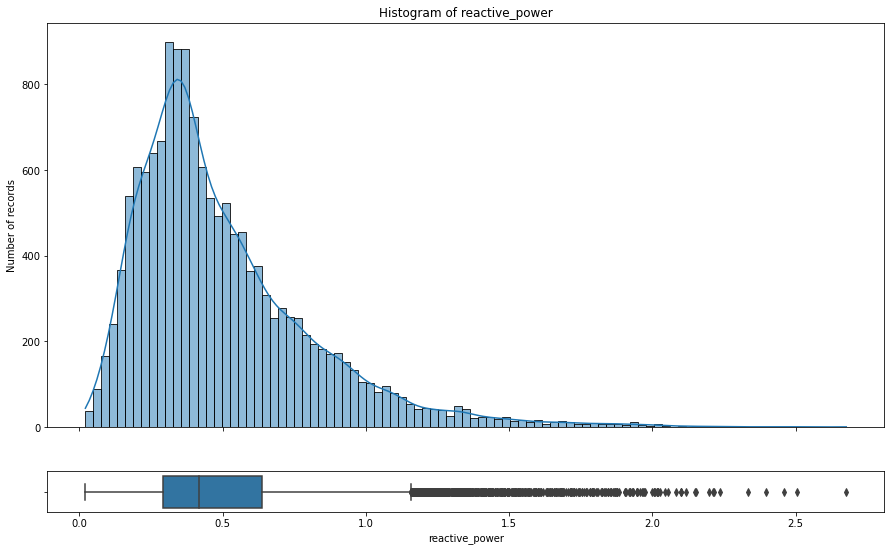

In [19]:
graph(df_arc['reactive_power'][df_arc['reactive_power'] > 0])

The `reactive power` distribution is also skewed to the right. The average value of reactive power is 0.5, the standard deviation is 0.31.

Before we move forward, we need to get rid of the batch with a negative reactive power.

### Bulk material feed data (volume)

In [20]:
df_bulk.head(5)

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [21]:
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 1 to 3241
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bulk 1   252 non-null    float64
 1   Bulk 2   22 non-null     float64
 2   Bulk 3   1298 non-null   float64
 3   Bulk 4   1014 non-null   float64
 4   Bulk 5   77 non-null     float64
 5   Bulk 6   576 non-null    float64
 6   Bulk 7   25 non-null     float64
 7   Bulk 8   1 non-null      float64
 8   Bulk 9   19 non-null     float64
 9   Bulk 10  176 non-null    float64
 10  Bulk 11  177 non-null    float64
 11  Bulk 12  2450 non-null   float64
 12  Bulk 13  18 non-null     float64
 13  Bulk 14  2806 non-null   float64
 14  Bulk 15  2248 non-null   float64
dtypes: float64(15)
memory usage: 391.1 KB


Let's convert the column names to lowercase and also convert them to snake case.

In [22]:
df_bulk.columns = df_bulk.columns.str.replace(r"([A-Z])", r" \1", regex=True).str.lower().str.replace(' ', '_').str[1:]

In [23]:
df_bulk.head(5)

,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
key,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [24]:
df_bulk.describe().T

,count,mean,std,min,25%,50%,75%,max
bulk_1,252.0,39.242063,18.277654,10.0,27.00,31.0,46.00,185.0
bulk_2,22.0,253.045455,21.180578,228.0,242.00,251.5,257.75,325.0
bulk_3,1298.0,113.879045,75.483494,6.0,58.00,97.5,152.00,454.0
bulk_4,1014.0,104.394477,48.184126,12.0,72.00,102.0,133.00,281.0
bulk_5,77.0,107.025974,81.790646,11.0,70.00,86.0,132.00,603.0
bulk_6,576.0,118.925347,72.057776,17.0,69.75,100.0,157.00,503.0
bulk_7,25.0,305.600000,191.022904,47.0,155.00,298.0,406.00,772.0
bulk_8,1.0,49.000000,NaN,49.0,49.00,49.0,49.00,49.0
bulk_9,19.0,76.315789,21.720581,63.0,66.00,68.0,70.50,147.0
bulk_10,176.0,83.284091,26.060347,24.0,64.00,86.5,102.00,159.0


In [25]:
df_bulk.isna().sum()

bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_8     3128
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64

In [26]:
df_bulk.duplicated().sum()

80

All columns in the table contain missing values. The nature of the missing values is known from the customer - the material was not added. Also, 80 duplicate values were found.

Let's look at the number of unique keys in the table.

In [27]:
df_bulk.index.nunique()

3129

The table contains 3129 unique batches.

Let's make histograms of the supply of bulk materials and look at the distributions.

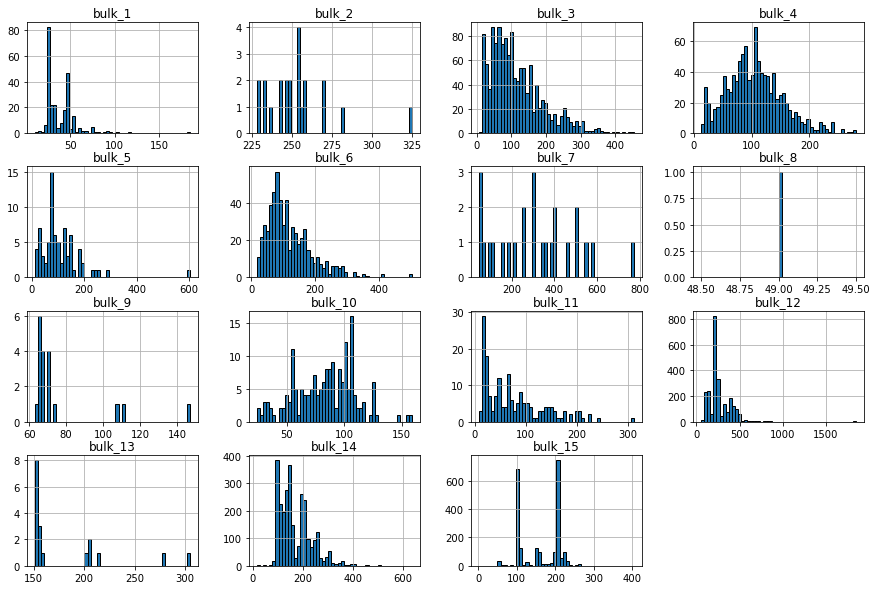

In [28]:
df_bulk.hist(bins=50, figsize=(15,10), edgecolor='black', linewidth=1)
plt.show()

All the graphs are different. For some materials, the distribution resembles normal (`bulk_4`) or skewed to the right (`bulk_3` and `bulk_6`). The rest of the materials have a large variance and there are outliers. It is also worth noting that the `bulk_8` material was used only once.

### Bulk materials feeding data (time)

In [29]:
df_bulk_time.head(5)

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
1,NaT,NaT,NaT,2019-05-03 11:21:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:03:52,NaT,2019-05-03 11:03:52,2019-05-03 11:03:52
2,NaT,NaT,NaT,2019-05-03 11:46:38,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:40:20,NaT,2019-05-03 11:40:20,2019-05-03 11:40:20
3,NaT,NaT,NaT,2019-05-03 12:31:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:09:40,NaT,2019-05-03 12:09:40,2019-05-03 12:09:40
4,NaT,NaT,NaT,2019-05-03 12:48:43,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:41:24,NaT,2019-05-03 12:41:24,2019-05-03 12:41:24
5,NaT,NaT,NaT,2019-05-03 13:18:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:12:56,NaT,2019-05-03 13:12:56,2019-05-03 13:12:56


In [30]:
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 1 to 3241
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Bulk 1   252 non-null    datetime64[ns]
 1   Bulk 2   22 non-null     datetime64[ns]
 2   Bulk 3   1298 non-null   datetime64[ns]
 3   Bulk 4   1014 non-null   datetime64[ns]
 4   Bulk 5   77 non-null     datetime64[ns]
 5   Bulk 6   576 non-null    datetime64[ns]
 6   Bulk 7   25 non-null     datetime64[ns]
 7   Bulk 8   1 non-null      datetime64[ns]
 8   Bulk 9   19 non-null     datetime64[ns]
 9   Bulk 10  176 non-null    datetime64[ns]
 10  Bulk 11  177 non-null    datetime64[ns]
 11  Bulk 12  2450 non-null   datetime64[ns]
 12  Bulk 13  18 non-null     datetime64[ns]
 13  Bulk 14  2806 non-null   datetime64[ns]
 14  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15)
memory usage: 391.1 KB


In [31]:
df_bulk_time.describe().T

,count,unique,top,freq,first,last
Bulk 1,252,252,2019-05-03 17:50:19,1,2019-05-03 17:50:19,2019-08-30 23:01:32
Bulk 2,22,22,2019-05-07 08:36:19,1,2019-05-07 08:36:19,2019-08-08 17:34:38
Bulk 3,1298,1298,2019-05-03 20:13:36,1,2019-05-03 20:13:36,2019-08-31 23:39:11
Bulk 4,1014,1014,2019-05-03 11:21:30,1,2019-05-03 11:21:30,2019-08-30 17:36:30
Bulk 5,77,77,2019-05-07 08:36:19,1,2019-05-07 08:36:19,2019-08-28 09:01:08
Bulk 6,576,576,2019-05-03 18:52:57,1,2019-05-03 18:52:57,2019-09-01 03:12:40
Bulk 7,25,25,2019-05-07 11:37:42,1,2019-05-07 11:37:42,2019-08-31 07:22:25
Bulk 8,1,1,2019-07-05 17:46:11,1,2019-07-05 17:46:11,2019-07-05 17:46:11
Bulk 9,19,19,2019-05-14 00:04:56,1,2019-05-14 00:04:56,2019-08-11 15:09:33
Bulk 10,176,176,2019-05-06 01:36:24,1,2019-05-06 01:36:24,2019-08-30 01:30:42


In [32]:
df_bulk_time.isna().sum()

Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64

Let's make histograms of the time of supply of bulk materials.

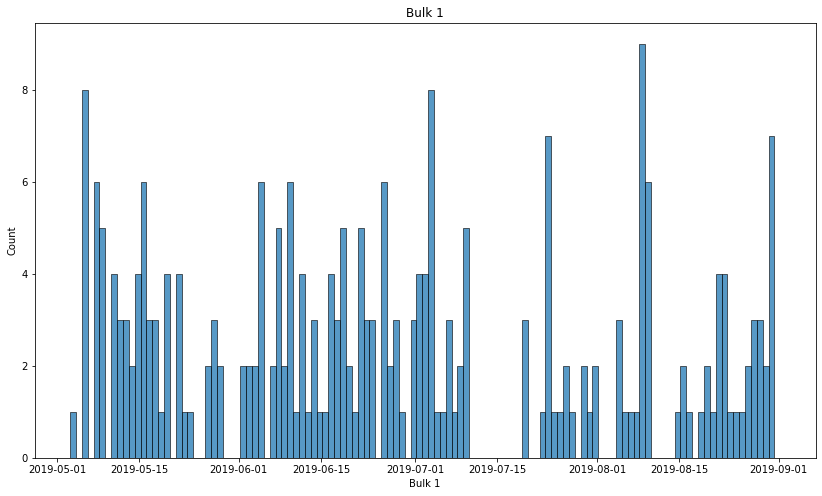

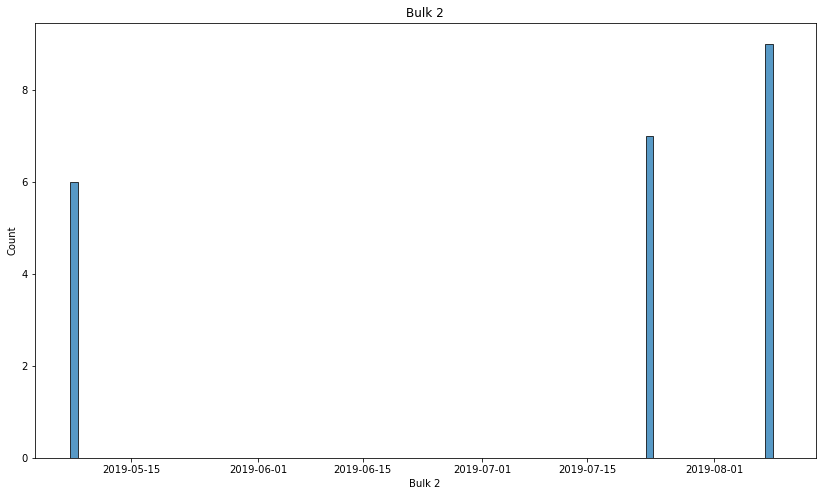

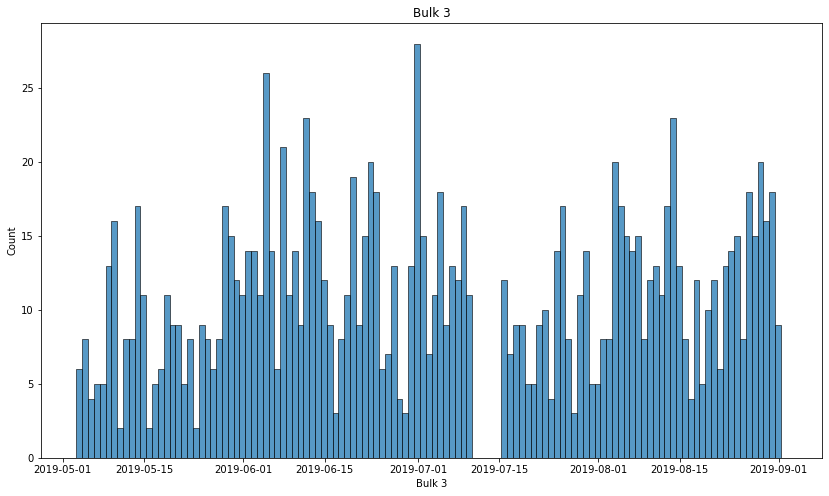

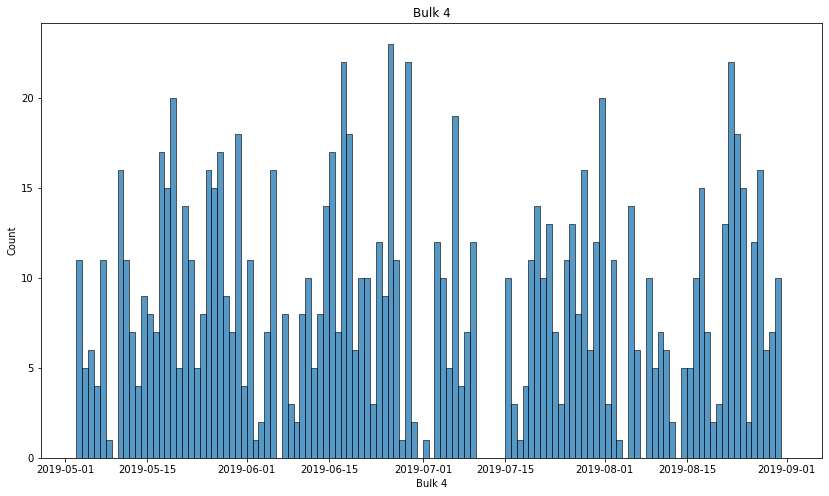

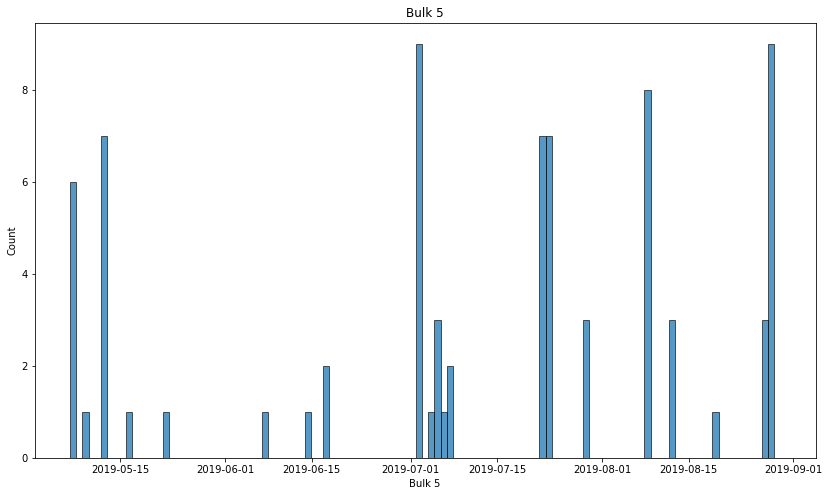

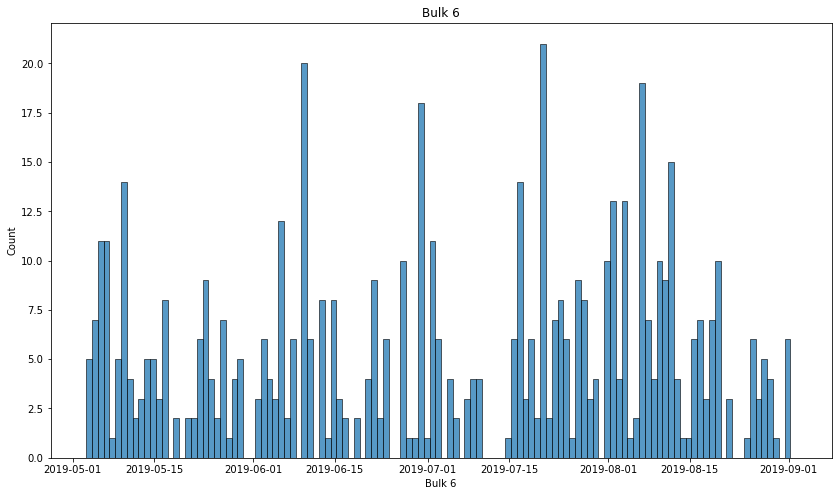

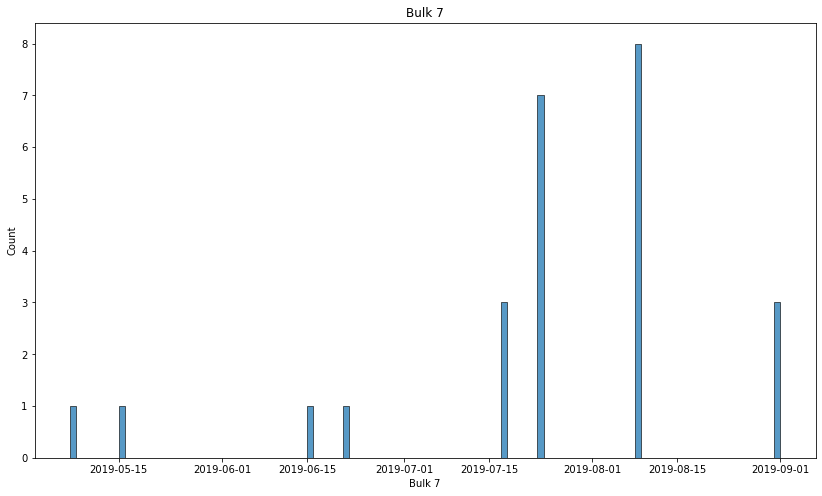

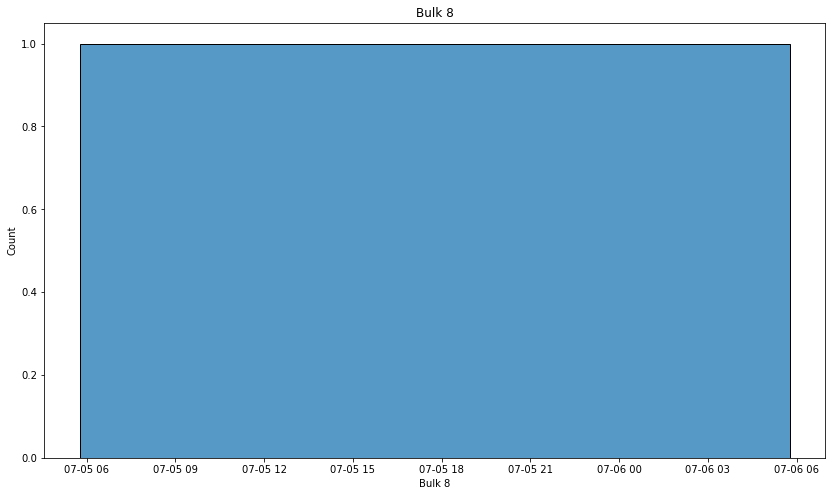

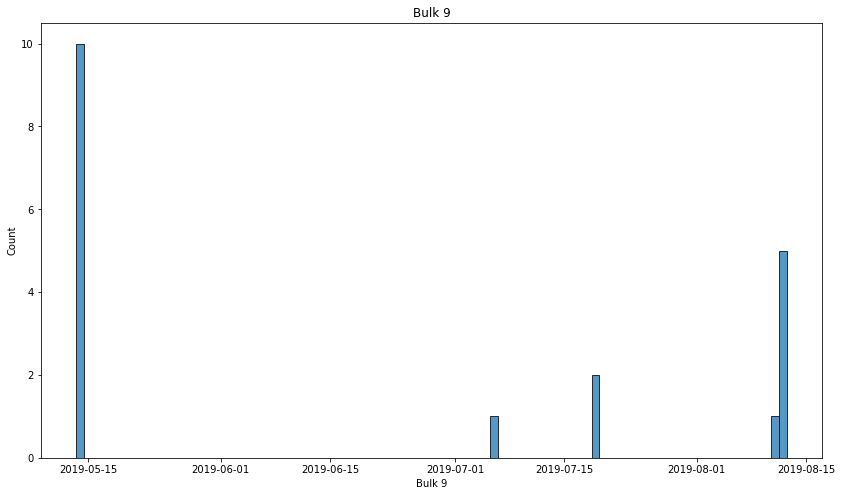

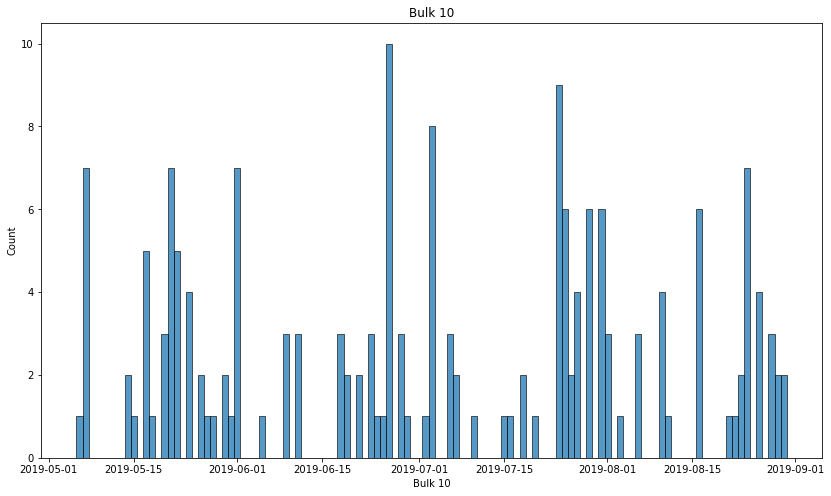

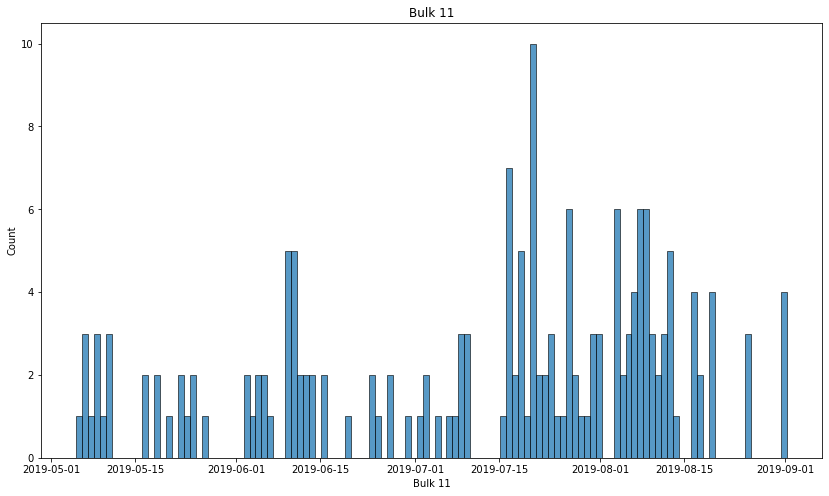

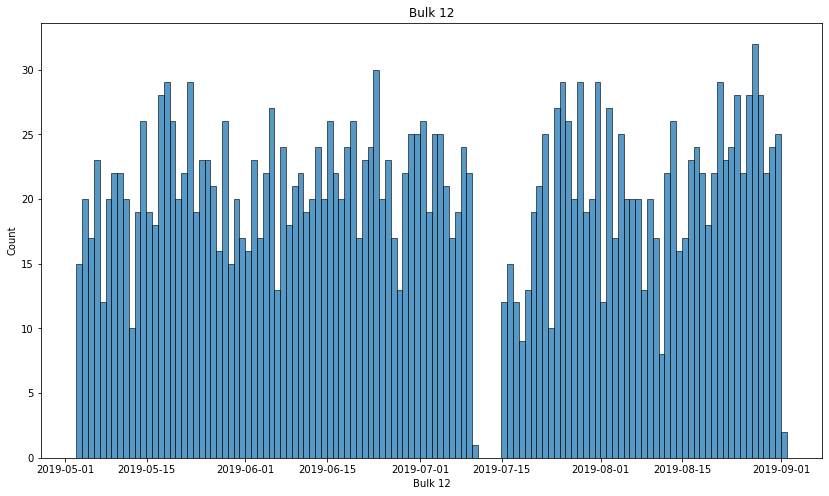

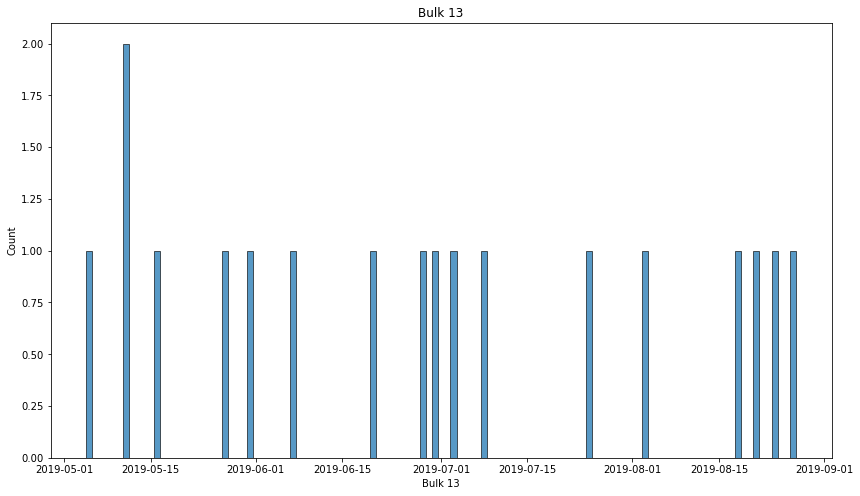

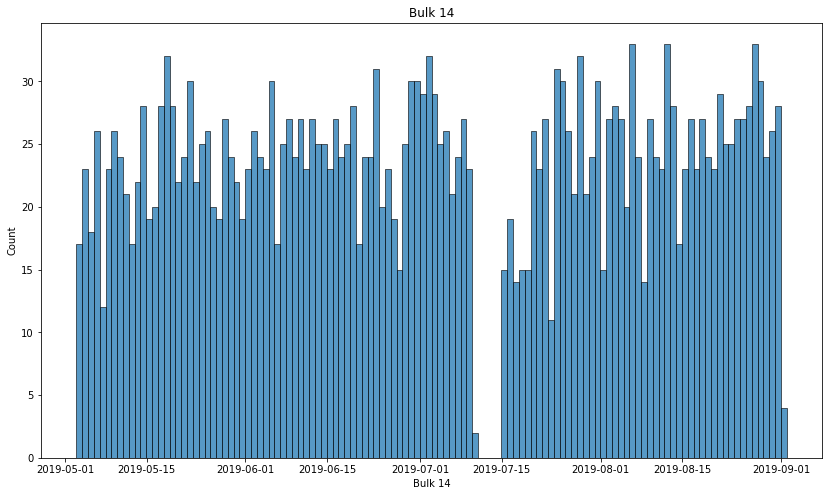

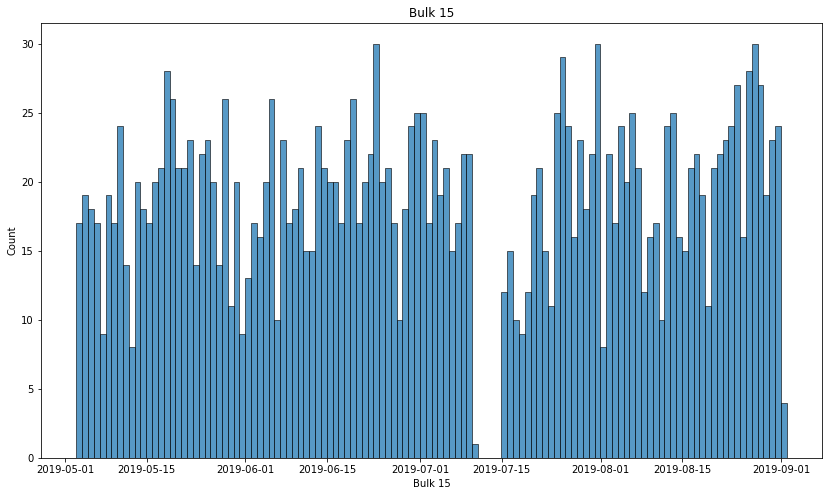

In [33]:
for bulk in df_bulk_time:
    plt.figure(figsize=(14,8))
    sns.histplot(data=df_bulk_time, x=bulk, discrete=True).set(title=bulk)
    plt.show()

We can see that there is no data for the period from July 11 to July 13, which is most likely associated with malfunctions. Since time data will not be used for training models as requested by the customer, we will not focus on this table.

###  Data about supplied gases for purging

In [34]:
df_gas.head(5)

,Газ 1
key,
1,29.749986
2,12.555561
3,28.554793
4,18.841219
5,5.413692


In [35]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3239 entries, 1 to 3241
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Газ 1   3239 non-null   float64
dtypes: float64(1)
memory usage: 50.6 KB


In [36]:
df_gas.describe()

,Газ 1
count,3239.000000
mean,11.002062
std,6.220327
min,0.008399
25%,7.043089
50%,9.836267
75%,13.769915
max,77.995040


First, let's rename the columns for convenience.

In [37]:
df_gas = df_gas.rename(columns={'Газ 1': 'gas_1'})

In [38]:
df_gas.head(5)

,gas_1
key,
1,29.749986
2,12.555561
3,28.554793
4,18.841219
5,5.413692


In [39]:
df_gas.isna().sum()

gas_1    0
dtype: int64

In [40]:
df_gas.duplicated().sum()

0

There are no missing or duplicate values in the table.

Let's look at the number of unique keys.

In [41]:
df_gas.index.nunique()

3239

**The table contains 3214 unique batches, which is different from the number in the electrode data table.**

Let's create a histogram of gas purge and look at the distribution.

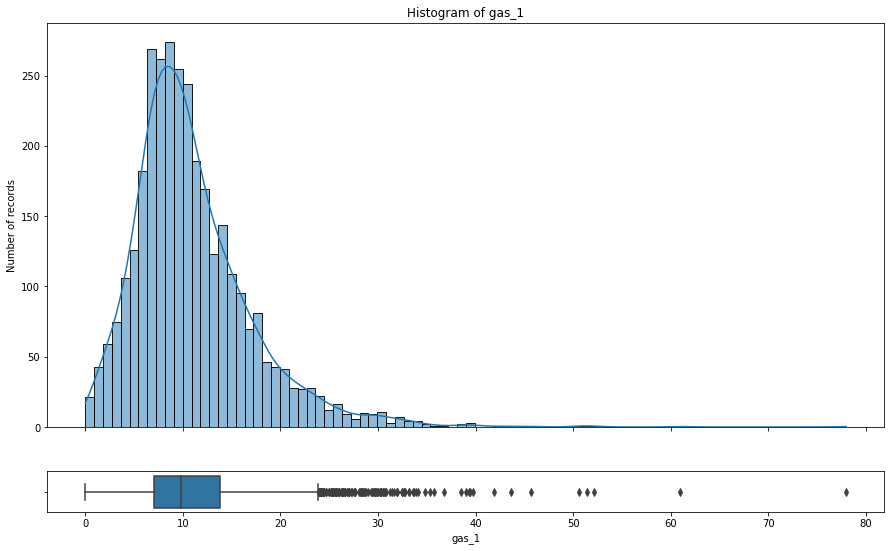

In [42]:
graph(df_gas['gas_1'])

The distribution is skewed to the right due to high values and outliers. The mean value is 11, the standard deviation is 6.22. There are also outliers up to 78.

### Temperature measurement results

In [43]:
df_temp.head(5)

,Время замера,Температура
key,,
1,2019-05-03 11:16:18,1571.0
1,2019-05-03 11:25:53,1604.0
1,2019-05-03 11:29:11,1618.0
1,2019-05-03 11:30:01,1601.0
1,2019-05-03 11:30:39,1613.0


In [44]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15907 entries, 1 to 3241
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Время замера  15907 non-null  datetime64[ns]
 1   Температура   13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 372.8 KB


In [45]:
df_temp.describe()

,Температура
count,13006.000000
mean,1591.840920
std,21.375851
min,1191.000000
25%,1581.000000
50%,1591.000000
75%,1601.000000
max,1705.000000


First, let's rename the columns for convenience.

In [46]:
df_temp = df_temp.rename(columns={'Время замера': 'measurement_time', 
                                  'Температура': 'temperature'
                                 }
                        )

In [47]:
df_temp.head(5)

,measurement_time,temperature
key,,
1,2019-05-03 11:16:18,1571.0
1,2019-05-03 11:25:53,1604.0
1,2019-05-03 11:29:11,1618.0
1,2019-05-03 11:30:01,1601.0
1,2019-05-03 11:30:39,1613.0


In [48]:
df_temp.isna().sum()

measurement_time       0
temperature         2901
dtype: int64

In [49]:
df_temp.duplicated().sum()

0

The `temperature` column contains 2901 missing values. We can assume that we have missing values due to failures of the measuring equipment. There are no duplicate data.

Let's check the number of unique keys in the table with temperature measurement data.

In [50]:
df_temp.index.nunique()

3216

The table contains 3216 unique batches, which is different from the number in the previous tables.

Let's create histograms of the measurement time and the temperature.

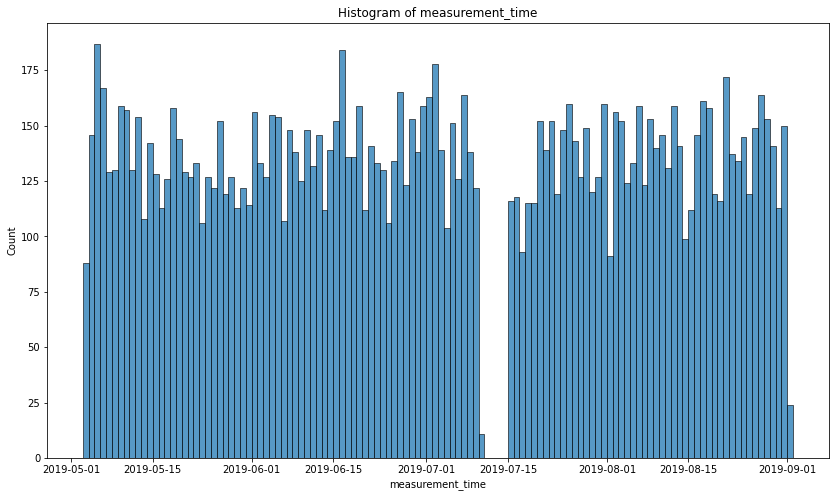

In [51]:
hist(df_temp['measurement_time'])

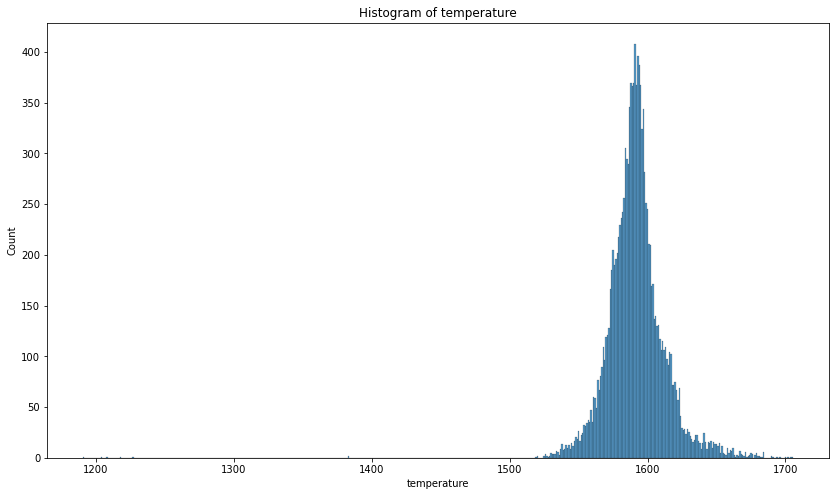

In [52]:
hist(df_temp['temperature'])

The `temperature` has a normal distribution with a long tail on the left due to values below 1500 degrees. Since the customer informed us that the temperature cannot go below 1500 degrees, it will be necessary to get rid of batches in which the temperature is less than 1500 degrees before training the models.

Let's look at the distribution of the 'cleaned' data.

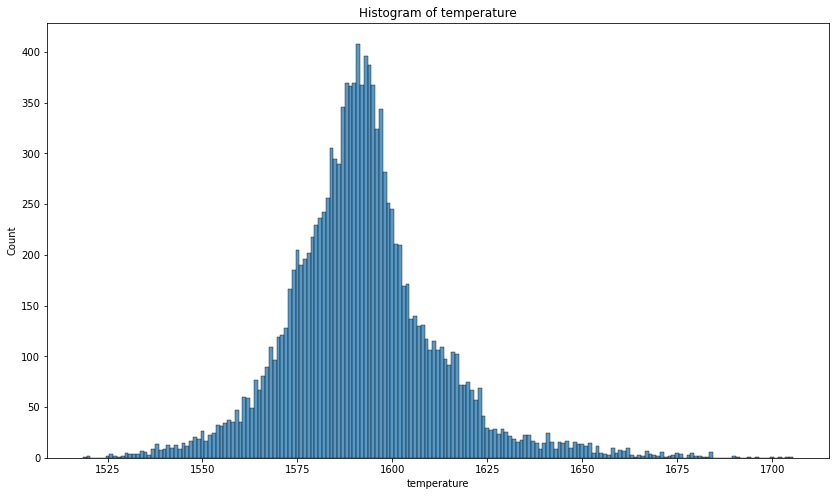

In [53]:
hist(df_temp['temperature'][df_temp['temperature'] > 1500])

The distribution now appears to be normal with a mean of 1592 and a standard deviation of 19.85.

### Wire materials data (volume)

In [54]:
df_wire.head(5)

,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 1 to 3241
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Wire 1  3055 non-null   float64
 1   Wire 2  1079 non-null   float64
 2   Wire 3  63 non-null     float64
 3   Wire 4  14 non-null     float64
 4   Wire 5  1 non-null      float64
 5   Wire 6  73 non-null     float64
 6   Wire 7  11 non-null     float64
 7   Wire 8  19 non-null     float64
 8   Wire 9  29 non-null     float64
dtypes: float64(9)
memory usage: 240.7 KB


In [56]:
df_wire.describe().T

,count,mean,std,min,25%,50%,75%,max
Wire 1,3055.0,100.895853,42.012518,1.918800,72.115684,100.158234,126.060483,330.314424
Wire 2,1079.0,50.577323,39.320216,0.030160,20.193680,40.142956,70.227558,282.780152
Wire 3,63.0,189.482681,99.513444,0.144144,95.135044,235.194977,276.252014,385.008668
Wire 4,14.0,57.442842,28.824667,24.148801,40.807002,45.234282,76.124619,113.231044
Wire 5,1.0,15.132000,NaN,15.132000,15.132000,15.132000,15.132000,15.132000
Wire 6,73.0,48.016974,33.919845,0.034320,25.053600,42.076324,64.212723,180.454575
Wire 7,11.0,10.039007,8.610584,0.234208,6.762756,9.017009,11.886057,32.847674
Wire 8,19.0,53.625193,16.881728,45.076721,46.094879,46.279999,48.089603,102.762401
Wire 9,29.0,34.155752,19.931616,4.622800,22.058401,30.066399,43.862003,90.053604


Let's convert the column names to lowercase and convert them to snake case.

In [57]:
df_wire.columns = df_wire.columns.str.replace(r"([A-Z])", r" \1", regex=True).str.lower().str.replace(' ', '_').str[1:]

In [58]:
df_wire.head(5)

,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
key,,,,,,,,,
1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_wire.isna().sum()

wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_5    3080
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64

In [60]:
df_wire.duplicated().sum()

403

All columns in the table contain missing values. The nature of the missing values is known from the customer - the material was not added. Also, 403 duplicate values were identified.

Let's look at the number of unique keys in the table.

In [61]:
df_wire.index.nunique()

3081

The table contains 3081 unique batches.

Let's create histograms of wire materials supply and look at the distributions.

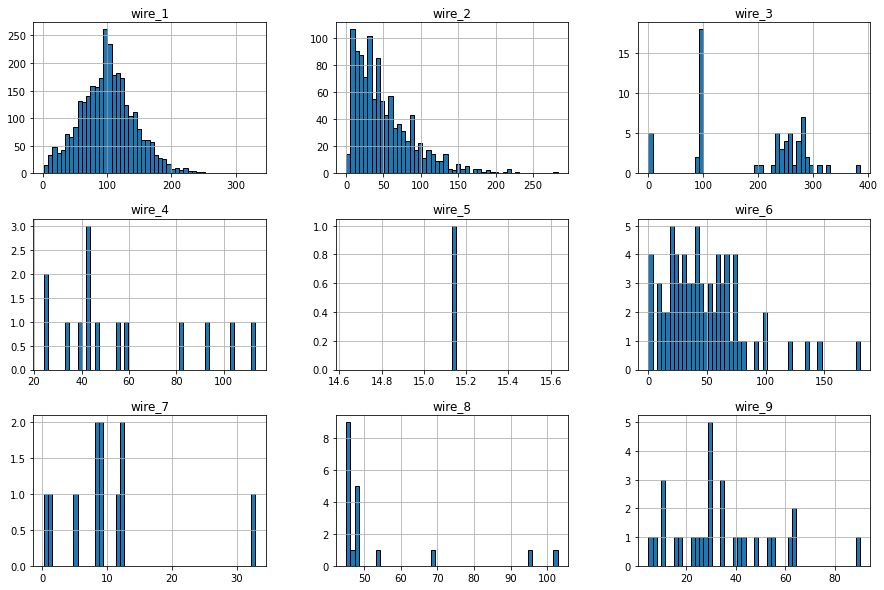

In [62]:
df_wire.hist(bins=50, figsize=(15,10), edgecolor='black', linewidth=1)
plt.show()

All the graphs are different. For some materials, the distribution resembles normal (`wire_1`) or skewed to the right (`wire_2`). The rest of the materials have a large variance and there are outliers. It's also worth noting that the `wire_5` was only used once.

### Wire material data (time)

In [63]:
df_wire_time.head(5)

,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
1,2019-05-03 11:11:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,2019-05-03 11:46:10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,2019-05-03 12:13:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,2019-05-03 12:48:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [64]:
df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 1 to 3241
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Wire 1  3055 non-null   datetime64[ns]
 1   Wire 2  1079 non-null   datetime64[ns]
 2   Wire 3  63 non-null     datetime64[ns]
 3   Wire 4  14 non-null     datetime64[ns]
 4   Wire 5  1 non-null      datetime64[ns]
 5   Wire 6  73 non-null     datetime64[ns]
 6   Wire 7  11 non-null     datetime64[ns]
 7   Wire 8  19 non-null     datetime64[ns]
 8   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9)
memory usage: 240.7 KB


In [65]:
df_wire_time.describe().T

,count,unique,top,freq,first,last
Wire 1,3055,3055,2019-05-03 11:11:41,1,2019-05-03 11:11:41,2019-09-01 04:16:01
Wire 2,1079,1079,2019-05-03 13:32:06,1,2019-05-03 13:32:06,2019-08-31 18:50:15
Wire 3,63,63,2019-05-04 04:47:53,1,2019-05-04 04:47:53,2019-08-28 02:11:18
Wire 4,14,14,2019-05-07 08:48:23,1,2019-05-07 08:48:23,2019-08-08 12:03:12
Wire 5,1,1,2019-08-08 16:01:07,1,2019-08-08 16:01:07,2019-08-08 16:01:07
Wire 6,73,73,2019-05-07 08:37:20,1,2019-05-07 08:37:20,2019-08-14 00:59:11
Wire 7,11,11,2019-07-23 12:42:00,1,2019-07-23 12:08:44,2019-08-08 18:27:34
Wire 8,19,19,2019-05-14 00:03:32,1,2019-05-14 00:03:32,2019-08-11 15:09:29
Wire 9,29,29,2019-05-04 16:09:11,1,2019-05-04 16:09:11,2019-08-29 03:51:31


In [66]:
df_wire_time.isna().sum()

Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

Let's create histograms of the time of supply of wire materials.

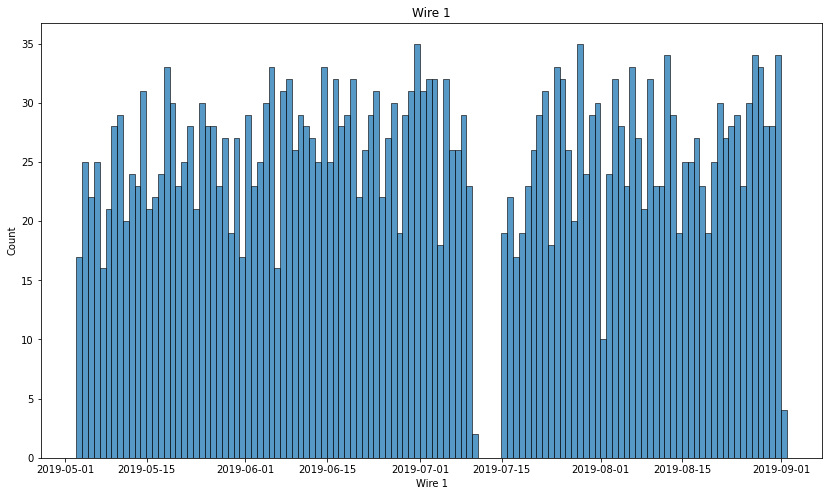

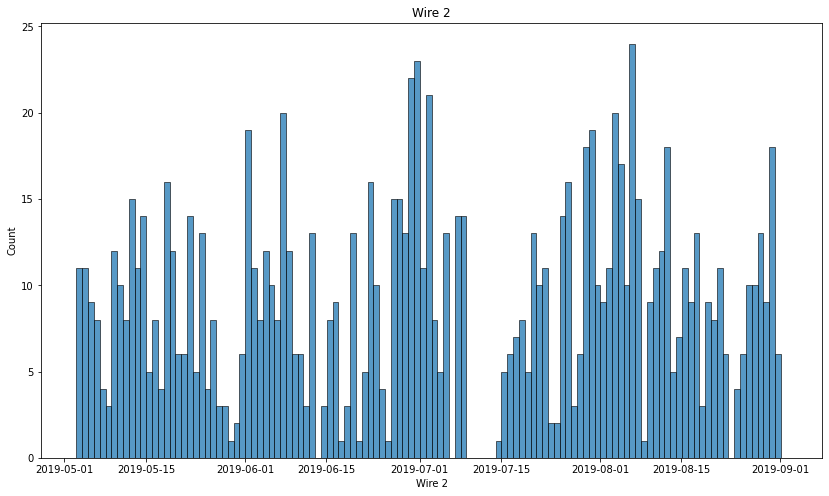

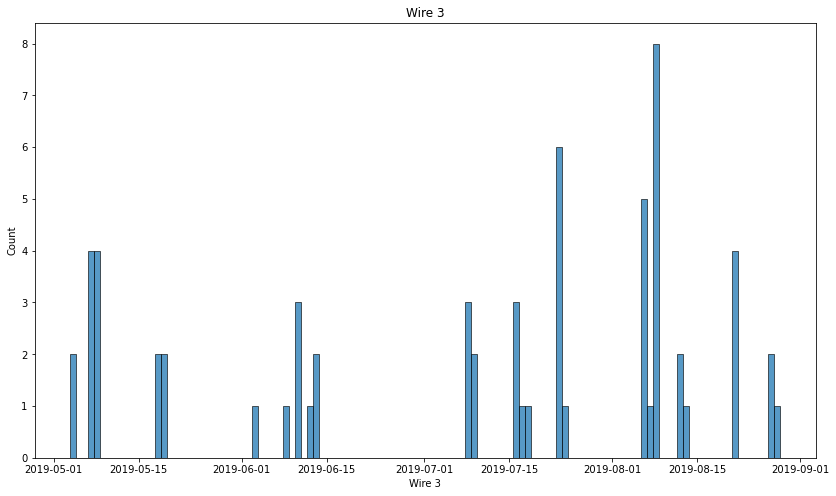

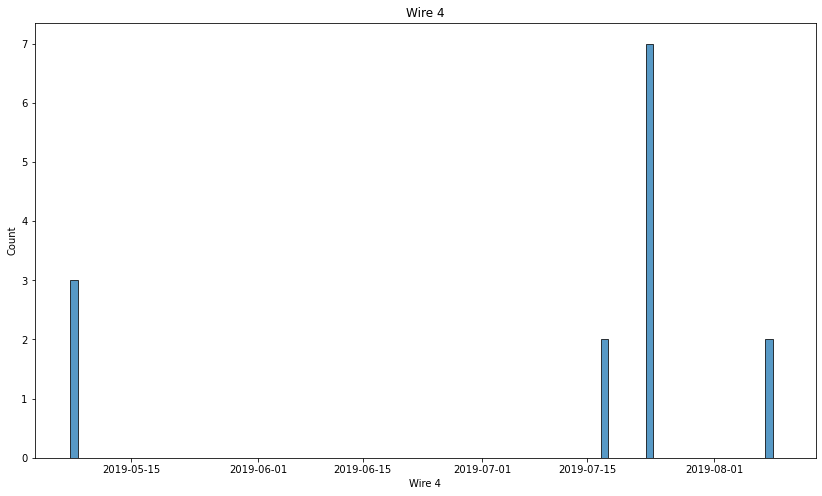

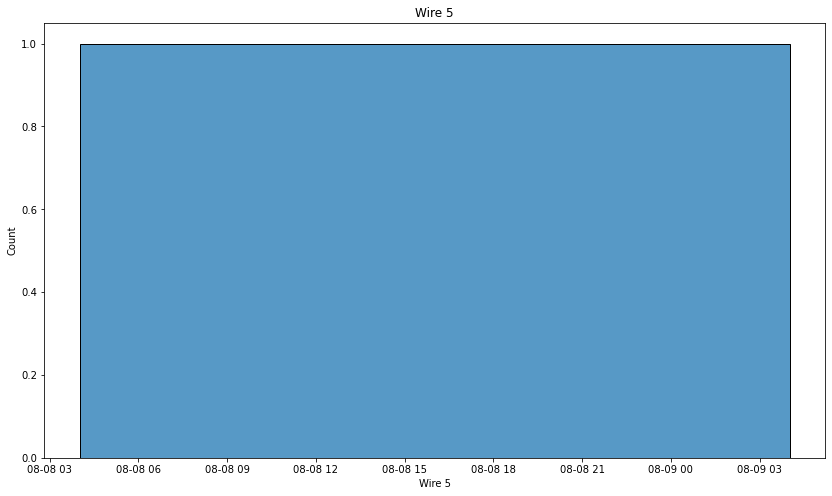

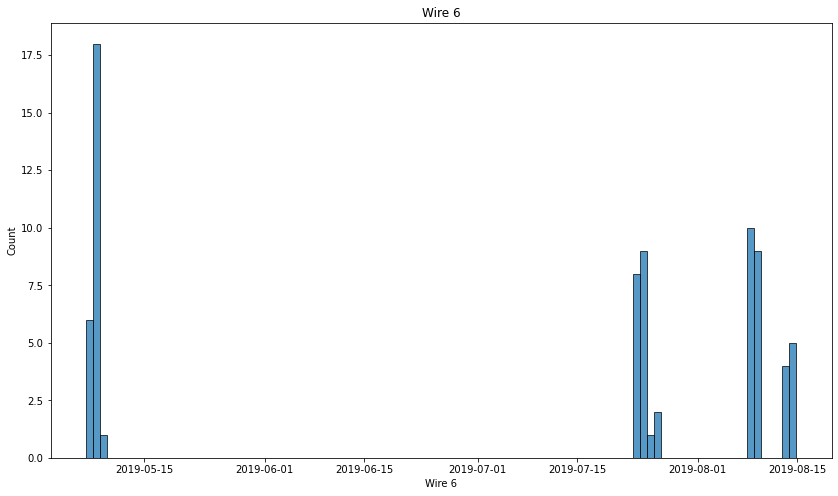

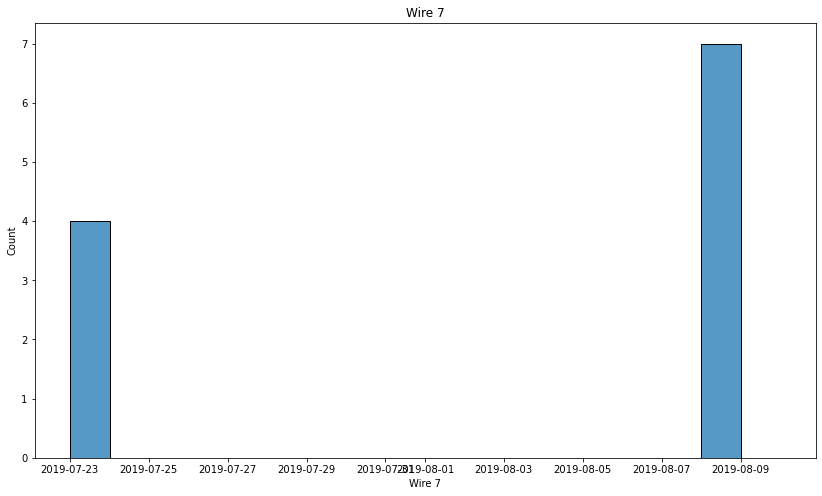

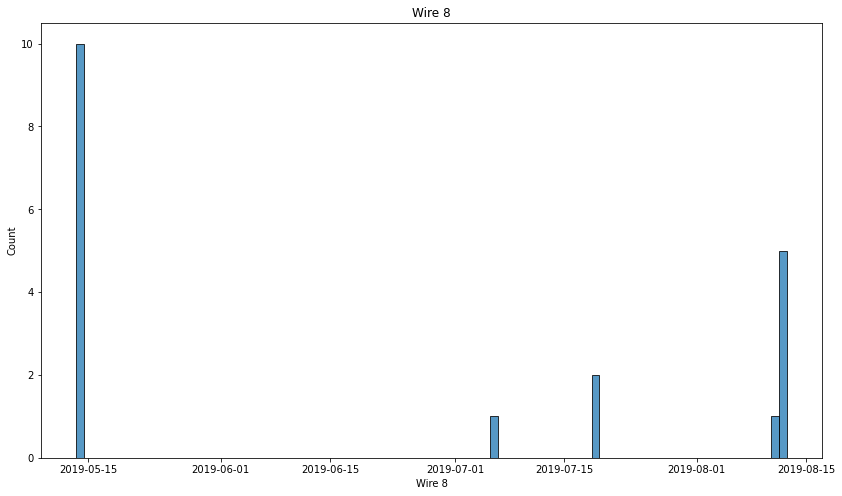

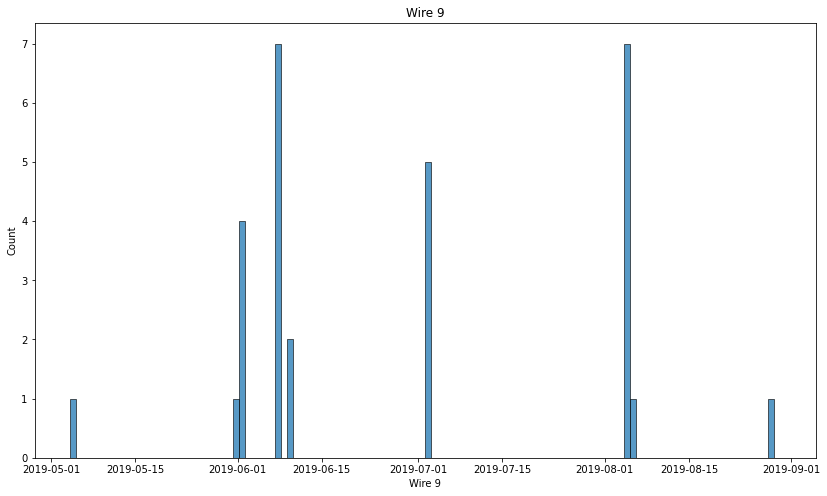

In [67]:
for wire in df_wire_time:
    plt.figure(figsize=(14,8))
    sns.histplot(data=df_wire_time, x=wire, discrete=True).set(title=wire)
    plt.show()

We can see that for the supply of wire materials there are also no data for the period from July 11 to July 13, which is also associated with malfunctions. Since time data will not be used for training models as requested by the customer, we will not focus on this table.

### Conclusion

We conducted an exploratory data analysis concluded the following:

1. The number of batches in all tables is different.
2. A batch with negative reactive power has been identified. It will be necessary to exclude this batch before training models.
3. From the time data for bulk and wire, it can be seen that there are no data for the period from 11 to 13 July. Most likely this is due to downtime due to a breakdown or scheduled repairs.
4. We identified measurements with temperatures below 1500 degrees. This data will need to be removed before training the models.
5. We also identified missing values in the temperature data and bulk and wire feed tables. The nature of the missing values is known from the customer - the material was not added.
6. There are duplicate values in the bulk and wire feed data.

## Data Preprocessing

During Exploratory data analysis, we found the following:
* a batch with negative reactive power
* measurements with temperatures below 1500 degrees 
* Missing values in temperature data and bulk and wire feed tables
* Duplicate values in the data on the supply of bulk and wire materials

Let's start the data preprocessing by processing the anomalies, as well as removing intermediate temperature measurements per customer's requirements. 

### Handling missing values and removing duplicates

Since the nature of the NaNs in the data on the supply of bulk and wire materials is known from the customer (the material was not added), we will fill in the missing values with zeros.

In [68]:
df_bulk = df_bulk.fillna(0)
df_wire = df_wire.fillna(0)

In [69]:
df_bulk.isna().sum()

bulk_1     0
bulk_2     0
bulk_3     0
bulk_4     0
bulk_5     0
bulk_6     0
bulk_7     0
bulk_8     0
bulk_9     0
bulk_10    0
bulk_11    0
bulk_12    0
bulk_13    0
bulk_14    0
bulk_15    0
dtype: int64

In [70]:
df_wire.isna().sum()

wire_1    0
wire_2    0
wire_3    0
wire_4    0
wire_5    0
wire_6    0
wire_7    0
wire_8    0
wire_9    0
dtype: int64

Let's get rid of duplicates in bulk materials data

In [71]:
df_bulk.duplicated().sum()

80

In [72]:
df_bulk = df_bulk.drop_duplicates()

In [73]:
df_bulk.duplicated().sum()

0

Let's get rid of duplicates in wire feed data

In [74]:
df_wire.duplicated().sum()

403

In [75]:
df_wire = df_wire.drop_duplicates()

In [76]:
df_wire.duplicated().sum()

0

### Handling anomalies

Let's get rid of batches with missing temperatures.

In [77]:
df_temp.isna().sum()

measurement_time       0
temperature         2901
dtype: int64

In [78]:
na_keys = df_temp[df_temp['temperature'].isna()].index.unique()
df_temp = df_temp[~df_temp.index.isin(na_keys)].copy()

Let's get rid of batches with temperatures below 1500.

In [79]:
low_t = df_temp[df_temp['temperature'] < 1500].index.unique()
df_temp = df_temp[~df_temp.index.isin(low_t)].copy()

Let's get rid of the batch with negative reactive power.

In [80]:
neg_power = df_arc[df_arc['reactive_power'] < 0].index.unique()
df_arc = df_arc[~df_arc.index.isin(neg_power)].copy()

Let's remove the intermediate temperatures, and also add such a parameter as the time between measurements.

In [81]:
dfs_list = []
for key in df_temp.index.unique():
    sorted = df_temp[df_temp.index == key].sort_values(by='measurement_time').copy()
    dfs_list.append(pd.concat([sorted.head(1), sorted.tail(1)]))

In [82]:
df_temp = pd.concat(dfs_list)

In [83]:
df_temp.head(10)

,measurement_time,temperature
key,,
1,2019-05-03 11:16:18,1571.0
1,2019-05-03 11:30:39,1613.0
2,2019-05-03 11:37:27,1581.0
2,2019-05-03 11:59:12,1602.0
3,2019-05-03 12:13:17,1596.0
3,2019-05-03 12:34:57,1599.0
4,2019-05-03 12:52:57,1601.0
4,2019-05-03 12:59:25,1625.0
5,2019-05-03 13:23:19,1576.0


In [84]:
df_temp = df_temp.groupby(by=df_temp.index).agg(['first', 'last'])
df_temp.columns = df_temp.columns.droplevel()
df_temp.columns = ['time_first', 'time_last', 'temp_first', 'temp_last']

In [85]:
df_temp['time_btw_measure'] = (
                                df_temp['time_last']-df_temp['time_first']
                                        ).apply(pd.Timedelta.total_seconds).astype('int')

In [86]:
df_temp = df_temp.drop(['time_first', 'time_last'], axis=1)

In [87]:
df_temp

,temp_first,temp_last,time_btw_measure
key,,,
1,1571.0,1613.0,861
2,1581.0,1602.0,1305
3,1596.0,1599.0,1300
4,1601.0,1625.0,388
5,1576.0,1602.0,762
...,...,...,...
2495,1570.0,1591.0,1137
2496,1554.0,1591.0,1618
2497,1571.0,1589.0,717


### Adding more features

Let's calculate and add to the table with data on the electrodes the apparent power, heating time and energy spent on heating.

Formula for calculating full power: $$S=\sqrt{Q^2 + P^2} $$, where

$S$ - apparent power

$Q$ - active power

$P$ - reactive power

In [88]:
df_arc['apparent_power'] = (df_arc['active_power'] ** 2 + df_arc['reactive_power'] ** 2) ** (0.5)
df_arc['heating_time'] = (df_arc['end_heating'] - df_arc['start_heating'])

df_arc['heating_time'] = df_arc['heating_time'].apply(pd.Timedelta.total_seconds).astype('int')

df_arc['energy'] = df_arc['heating_time'] * df_arc['active_power']

### Feature aggregation and table merging

Let's group the data for apparent power, heating time and energy.

In [89]:
df_arc = df_arc.groupby(by=df_arc.index).agg({'apparent_power': sum, 'heating_time': sum, 'energy': sum})

In [90]:
df_arc.head(5)

,apparent_power,heating_time,energy
key,,,
1,5.826395,1098,1207.804249
2,3.649216,811,733.816470
3,2.989534,655,443.583327
4,3.814962,741,670.663327
5,4.035758,869,997.496095


Let's merge all tables using the keys. We will take into account only those keys that we have in all tables.

In [91]:
df_final = df_temp.merge(
                         df_arc, 
                         on='key',
                         how='inner'
                        ).merge(
                                df_bulk.fillna(value=0), 
                                on='key', 
                         how='inner'
                        ).merge(
                                df_gas, 
                                on='key', 
                         how='inner'
                        ).merge(
                                df_wire.fillna(value=0), 
                                on='key', 
                         how='inner'
                        )

In [92]:
df_final.head(5)

,temp_first,temp_last,time_btw_measure,apparent_power,heating_time,energy,bulk_1,bulk_2,bulk_3,bulk_4,...,gas_1,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
key,,,,,,,,,,,,,,,,,,,,,
1,1571.0,1613.0,861,5.826395,1098,1207.804249,0.0,0.0,0.0,43.0,...,29.749986,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1581.0,1602.0,1305,3.649216,811,733.816470,0.0,0.0,0.0,73.0,...,12.555561,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1596.0,1599.0,1300,2.989534,655,443.583327,0.0,0.0,0.0,34.0,...,28.554793,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1601.0,1625.0,388,3.814962,741,670.663327,0.0,0.0,0.0,81.0,...,18.841219,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1576.0,1602.0,762,4.035758,869,997.496095,0.0,0.0,0.0,78.0,...,5.413692,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data split and model training

The data has been preprocessed. Let's divide the data into features and a target variable.

In [93]:
features = df_final.drop('temp_last', axis=1)
target = df_final['temp_last']

In [94]:
print('Features shape:',features.shape)
print('Target Variable shape:',target.shape)

Features shape: (2028, 30)
Target Variable shape: (2028,)


Let's split the data into two sets: training and test. We will use the training set for model training, hyperparameter tuning and cross-validation, and the test set for testing the best model.

In [95]:
X_train , X_test , y_train , y_test = train_test_split (
    features, target, test_size = .25,
    random_state = RANDOM_STATE
)

In [96]:
print('Features shape of the training set:', X_train.shape), 
print('Target variable shape of the training set:', y_train.shape), 
print('Features shape of the test set:', X_test.shape), 
print('Target variable shape of the test set:', y_test.shape)

Features shape of the training set: (1521, 30)
Target variable shape of the training set: (1521,)
Features shape of the test set: (507, 30)
Target variable shape of the test set: (507,)


We split the data into two sets in a ratio of 75 to 25:

     X_train, y_train - training set
     X_test, y_test - test set

Let's create lists to add model results to them. After the tests, we will create a summary table and analyze the results.

In [97]:
model_name = []
model_mae = []

<b> ElasticNet</b>

To begin with, let's tune hyperparameters using GridSearchCV, and then train the ElasticNet model. We will use a pipeline with a StandardScaler to feed the data into the model. 

In [98]:
pipe_en = Pipeline(
        [('scaler', StandardScaler()),
         ('en', ElasticNet())]
    )  

In [99]:
grid_en = {'en__alpha': (0.1, 1), 
                 'en__l1_ratio': (0.1, 1), 
                 'en__random_state': [RANDOM_STATE]}

In [100]:
grid_en = GridSearchCV(pipe_en, grid_en, cv=5, scoring='neg_mean_absolute_error')
grid_en.fit(X_train, y_train)

mae_en = abs(grid_en.best_score_)
print(f'The best MAE for ElasticNet: {mae_en}')

The best MAE for ElasticNet: 6.350334830137163


In [101]:
model_name.append('ElasticNet')
model_mae.append(mae_en)

<b>Random Forest</b>

Let's tune hyperparameters using GridSearchCV, and then train the `Random Forest` model. For a `Random Forest` model, there is no need to scale the data.

In [102]:
rf_reg = RandomForestRegressor()    

In [103]:
grid_rf = {'n_estimators': [20, 40, 60, 80, 100, 120],
           'random_state': [RANDOM_STATE]}

In [104]:
grid_rf = GridSearchCV(rf_reg, grid_rf, cv=5, scoring='neg_mean_absolute_error')
grid_rf.fit(X_train, y_train)

mae_rf = abs(grid_rf.best_score_)
print(f'The best MAE for Random Forest: {mae_rf}')

The best MAE for Random Forest: 6.1072524266609145


In [105]:
model_name.append('Random Forest')
model_mae.append(mae_rf)

<b>LightGBM </b>

Let's tune hyperparameters using GridSearchCV, train the model and check the MAE on the training data.

In [106]:
lgbm = lgb.LGBMRegressor()

In [107]:
grid_lgbm = {'learning_rate': [0.01, 0.1, 0.3], 
             'num_iterations': [100, 200], 
             'random_state': [RANDOM_STATE]}

In [108]:
grid_lgbm = GridSearchCV(lgbm, grid_lgbm, cv=5, scoring='neg_mean_absolute_error', verbose=20, n_jobs=-1) 
grid_lgbm.fit(X_train, y_train)

mae_lgbm = abs(grid_lgbm.best_score_)
print(f'The best MAE for LightGBM: {mae_lgbm}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
The best MAE for LightGBM: 6.060241394291451


In [109]:
model_name.append('LightGBM')
model_mae.append(mae_lgbm)

<b>Voting Regressor </b>

Let's create an ensemble of models (`Random Forest`, `ElasticNet` and `LightGBM`) based on `VotingRegressor`. For ElasticNet, we will feed the features through a pipeline with scaling (StandardScaler). We will check the value of the MAE using cross-validation.

In [110]:
rf_reg = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=100)
en_reg = Pipeline(
    [('scaler', StandardScaler()),
     ('en', ElasticNet(random_state=RANDOM_STATE, alpha=0.1, l1_ratio=1))]
    )
lgbm_reg = lgb.LGBMRegressor(random_state=RANDOM_STATE, learning_rate=0.1, num_iterations=100)

In [111]:
voting_reg = VotingRegressor(estimators=[('rf', rf_reg), 
                                        ('en', en_reg), 
                                        ('lgbm', lgbm_reg)])

cv_scores = cross_val_score(voting_reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [112]:
mae_voting = abs(cv_scores.mean())
print(f'The best cross-validation MAE for Voting Regressor: {mae_voting}')

The best cross-validation MAE for Voting Regressor: 5.883075050927628


In [113]:
model_name.append('VotingRegressor')
model_mae.append(mae_voting)

<b>Stacking (ElasticNet, Random Forest, SGD + CatBoost (final))</b>

Let's create an ensemble of models using the `Stack method`. We will use the following models: `ElasticNet`, `Random Forest`, `SGD`. For linear models such as `ElasticNet` and `SGD`, we will feed the features through a pipeline with StandardScaler scaling. We will make the final prediction using `CatBoost`. Cross validation is already built into the `StackingRegressor` by default.

In [114]:
estimators = [('en', Pipeline([('scaler', StandardScaler()),
                                ('en', ElasticNet(random_state=RANDOM_STATE, alpha=0.1, l1_ratio=1))])),
              ('rf', RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=100)),
              ('sgd', Pipeline([('scaler', StandardScaler()),
                                 ('sgd', SGDRegressor(random_state=RANDOM_STATE, max_iter=1000, tol=1e-3))]
    ))]

In [115]:
final_estimator = CatBoostRegressor(random_seed=RANDOM_STATE,
                                    depth=4,
                                    iterations=200,
                                    learning_rate=0.1,
                                    verbose=False)

stacking_model = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

In [116]:
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('en',
                               Pipeline(steps=[('scaler', StandardScaler()),
                                               ('en',
                                                ElasticNet(alpha=0.1,
                                                           l1_ratio=1,
                                                           random_state=11122))])),
                              ('rf', RandomForestRegressor(random_state=11122)),
                              ('sgd',
                               Pipeline(steps=[('scaler', StandardScaler()),
                                               ('sgd',
                                                SGDRegressor(random_state=11122))]))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x000001DE544D0E20>)

In [117]:
stacking_model_pred_train = stacking_model.predict(X_train)
mae_stacking = mean_absolute_error(y_train, stacking_model_pred_train)
print(f'The best MAE for Stacking ensemble on the training data: {mae_stacking}')

The best MAE for Stacking ensemble on the training data: 4.643704760662627


In [118]:
model_name.append('Stacking')
model_mae.append(mae_stacking)

<b>CatBoost </b>

Let's tune hyperparameters using GridSearchCV, train the model and check the MAE on the training data.

In [119]:
catboost = CatBoostRegressor()

In [120]:
grid_catboost_params = {'learning_rate': [0.01, 0.1], 
                        'depth': [4, 6, 10], 
                        'iterations': [100, 200], 
                        'verbose': [20], 
                        'random_seed': [RANDOM_STATE]}

In [121]:
grid_catboost = GridSearchCV(catboost, grid_catboost_params, cv=5, scoring='neg_mean_absolute_error')
grid_catboost.fit(X_train, y_train)

0:	learn: 11.6603959	total: 6.66ms	remaining: 660ms
20:	learn: 11.1479400	total: 67.9ms	remaining: 255ms
40:	learn: 10.7359525	total: 110ms	remaining: 159ms
60:	learn: 10.4035052	total: 140ms	remaining: 89.7ms
80:	learn: 10.1037029	total: 174ms	remaining: 40.9ms
99:	learn: 9.8637508	total: 206ms	remaining: 0us
0:	learn: 11.2529852	total: 2.78ms	remaining: 275ms
20:	learn: 10.7774025	total: 40.3ms	remaining: 152ms
40:	learn: 10.3682817	total: 70.2ms	remaining: 101ms
60:	learn: 10.0310003	total: 99ms	remaining: 63.3ms
80:	learn: 9.7346181	total: 138ms	remaining: 32.4ms
99:	learn: 9.5080973	total: 192ms	remaining: 0us
0:	learn: 10.9262003	total: 2.73ms	remaining: 270ms
20:	learn: 10.4933672	total: 49.7ms	remaining: 187ms
40:	learn: 10.1295627	total: 100ms	remaining: 144ms
60:	learn: 9.8340119	total: 144ms	remaining: 91.8ms
80:	learn: 9.5732681	total: 185ms	remaining: 43.5ms
99:	learn: 9.3624536	total: 223ms	remaining: 0us
0:	learn: 11.3884338	total: 2.26ms	remaining: 224ms
20:	learn: 10.8

0:	learn: 10.9118757	total: 2.35ms	remaining: 469ms
20:	learn: 8.5491538	total: 35ms	remaining: 298ms
40:	learn: 7.7753115	total: 64ms	remaining: 248ms
60:	learn: 7.3590969	total: 97.3ms	remaining: 222ms
80:	learn: 7.0304015	total: 132ms	remaining: 194ms
100:	learn: 6.6346453	total: 170ms	remaining: 166ms
120:	learn: 6.2933712	total: 211ms	remaining: 138ms
140:	learn: 6.0342863	total: 241ms	remaining: 101ms
160:	learn: 5.8207141	total: 271ms	remaining: 65.5ms
180:	learn: 5.6491334	total: 300ms	remaining: 31.5ms
199:	learn: 5.5081675	total: 331ms	remaining: 0us
0:	learn: 11.6604612	total: 3.65ms	remaining: 362ms
20:	learn: 11.0495163	total: 78.8ms	remaining: 296ms
40:	learn: 10.5365503	total: 144ms	remaining: 207ms
60:	learn: 10.1323166	total: 213ms	remaining: 136ms
80:	learn: 9.7921039	total: 284ms	remaining: 66.7ms
99:	learn: 9.5057563	total: 357ms	remaining: 0us
0:	learn: 11.2478783	total: 3.85ms	remaining: 381ms
20:	learn: 10.6922157	total: 69.1ms	remaining: 260ms
40:	learn: 10.2041

60:	learn: 6.6132197	total: 289ms	remaining: 659ms
80:	learn: 6.1081982	total: 363ms	remaining: 533ms
100:	learn: 5.6831957	total: 433ms	remaining: 425ms
120:	learn: 5.3651673	total: 535ms	remaining: 349ms
140:	learn: 5.0580915	total: 616ms	remaining: 258ms
160:	learn: 4.8008998	total: 687ms	remaining: 166ms
180:	learn: 4.5451397	total: 769ms	remaining: 80.7ms
199:	learn: 4.3405382	total: 835ms	remaining: 0us
0:	learn: 10.8765281	total: 3.75ms	remaining: 747ms
20:	learn: 8.0740195	total: 91.4ms	remaining: 779ms
40:	learn: 7.2928118	total: 178ms	remaining: 691ms
60:	learn: 6.7575441	total: 246ms	remaining: 561ms
80:	learn: 6.1791859	total: 343ms	remaining: 503ms
100:	learn: 5.7279060	total: 421ms	remaining: 413ms
120:	learn: 5.3379756	total: 508ms	remaining: 332ms
140:	learn: 5.0902335	total: 584ms	remaining: 244ms
160:	learn: 4.8214921	total: 658ms	remaining: 159ms
180:	learn: 4.5911911	total: 728ms	remaining: 76.5ms
199:	learn: 4.3074954	total: 829ms	remaining: 0us
0:	learn: 11.654565

100:	learn: 3.9035098	total: 4.63s	remaining: 4.54s
120:	learn: 3.4700995	total: 5.49s	remaining: 3.58s
140:	learn: 3.1358326	total: 6.4s	remaining: 2.68s
160:	learn: 2.8483609	total: 7.3s	remaining: 1.77s
180:	learn: 2.5556165	total: 8.14s	remaining: 854ms
199:	learn: 2.2854024	total: 8.91s	remaining: 0us
0:	learn: 11.0601698	total: 40.5ms	remaining: 8.06s
20:	learn: 7.3603179	total: 999ms	remaining: 8.52s
40:	learn: 6.0236728	total: 1.83s	remaining: 7.09s
60:	learn: 5.2008820	total: 2.73s	remaining: 6.23s
80:	learn: 4.6340836	total: 3.63s	remaining: 5.33s
100:	learn: 4.1525128	total: 4.5s	remaining: 4.41s
120:	learn: 3.6960949	total: 5.37s	remaining: 3.51s
140:	learn: 3.2530792	total: 6.23s	remaining: 2.61s
160:	learn: 2.9198296	total: 7.25s	remaining: 1.75s
180:	learn: 2.6129284	total: 8.15s	remaining: 855ms
199:	learn: 2.3480977	total: 8.96s	remaining: 0us
0:	learn: 10.8511855	total: 45.7ms	remaining: 9.09s
20:	learn: 7.2580246	total: 1.14s	remaining: 9.73s
40:	learn: 5.9225786	tot

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001DE56BE8A30>,
             param_grid={'depth': [4, 6, 10], 'iterations': [100, 200],
                         'learning_rate': [0.01, 0.1], 'random_seed': [11122],
                         'verbose': [20]},
             scoring='neg_mean_absolute_error')

In [122]:
mae_catboost = abs(grid_catboost.best_score_)
print(f'The best MAE for CatBoost: {mae_catboost}')

The best MAE for CatBoost: 5.780691026594979


In [123]:
model_name.append('CatBoost')
model_mae.append(mae_catboost)

### Model Analysis

Let's create a summary table and compare the models.

In [124]:
model_comparison = pd.DataFrame(
    {
    'model_name': model_name, 
    'MAE': model_mae
    }
).sort_values(by='MAE').reset_index(drop=True)

model_comparison.style.highlight_min(
    'MAE', 
    color='lightgreen', 
    axis=0
)

,model_name,MAE
0,Stacking,4.643705
1,CatBoost,5.780691
2,VotingRegressor,5.883075
3,LightGBM,6.060241
4,Random Forest,6.107252
5,ElasticNet,6.350335


<b>Conclusion</b>

`Stacking` model based on `ElasticNet`, `Random Forest` and `SGD` with the final prediction using `CatBoost`, as well as the `CatBoost` model and the `VotingRegressor` ensemble showed a MAE result below 6. The `LightGBM`, `RandomForest` and `ElasticNet` models did not pass the threshold of MAE < 6. Since `Stacking` ensemble showed the best result, we will test it on the test data.

Let's look at the importance of features for the `CatBoost` model.

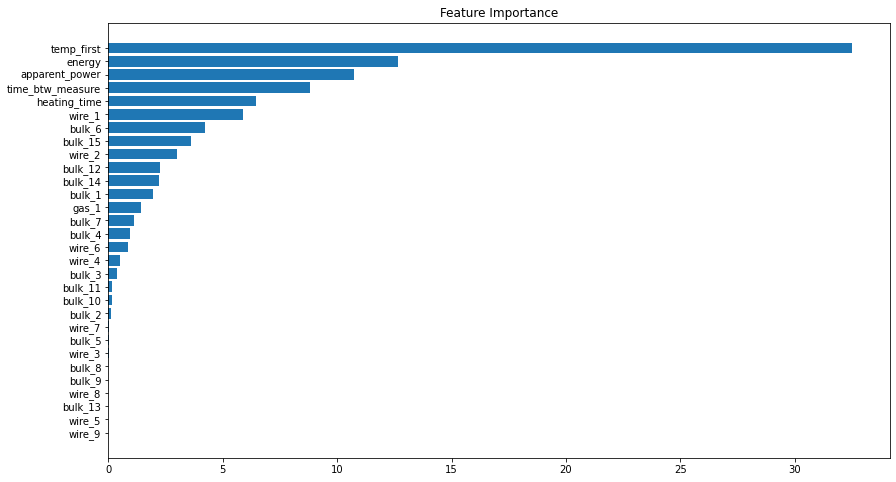

In [125]:
feature_importance = grid_catboost.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(14, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

We can see that the `initial temperature`, as well as the `energy` spent on heating, have the greatest influence on the final temperature. The `cooling time` of the alloy between iterations also plays an important role. If we talk about materials, then the wire material `wire_1`, as well as bulk materials `bulk_6` and `bulk_15`, have the greatest influence on the prediction.

### Checking the best model on test data

<b>Stacking (ElasticNet, Random Forest, SGD + CatBoost (final))</b>

Let's check how the model performs on the test data.

In [126]:
stacking_model_pred_test = stacking_model.predict(X_test)
mae_stacking_test = mean_absolute_error(y_test, stacking_model_pred_test)
print(f'The best MAE for Stacking ensemble on the test data: {mae_stacking_test}')

The best MAE for Stacking ensemble on the test data: 5.79825611025707


### Sanity Check

We will perform a sanity check by comparing the MAE of the trained model with the MAE of the constant model (mean). To do this, we use the DummyRegressor tool from the sklearn library.

In [127]:
dummy = DummyRegressor(strategy = 'mean')
dummy.fit(X_train, y_train)
dummy_predictions = dummy.predict(X_test)
mae_dummy = mean_absolute_error(y_test, dummy_predictions)
print(f'MAE of the constant model: {mae_dummy}')

MAE of the constant model: 8.695198191784447


All the trained models passed the sanity check, as their MAE is lower than that of the constant model. 

## Report

<b>Introduction</b>


To optimize production costs, the metallurgical plant "ABC Steel" LLC decided to reduce electricity consumption during the steel processing. We need to build a model that predicts the temperature of the steel.

Description of the processing step

Ladle furnace unit (LFU) - metallurgical equipment for out-of-furnace steel processing in the converter shop. The LFU is a large metal ladle with a volume of about 100 tons and is lined from the inside with refractory bricks. Molten steel is poured into the LFU from a steel ladle and then heated by graphite electrodes inserted into the unit's lid.

In addition to electric heating, desulfurization (removal of sulfur from the melt), adjustment of the chemical composition, and sampling are carried out at the CPC. Alloying of metal is carried out both with lumpy ferroalloys through the system to supply bulk materials from bunkers and with wire materials through a tube apparatus. Averaging the chemical composition and temperature is carried out through the bottom purge device in the steel ladle.

After completion of processing at the LFU, the melt is poured back into the steel ladle and either sent to other metal finishing units or to a continuous casting plant, where it solidifies in the form of metallurgical slabs.

Each time the melt enters the Ladle Furnace Unit, the initial temperature and chemical composition are measured. Then, if necessary, the melt is heated for several minutes, after which alloying materials are added, purged with a gas, stirring the melt, and measurements are again carried out following the approved Technological Instruction. This cycle is repeated several times until the target chemistry and melting temperature are reached. In this case, it is not necessary that the melt would be heated in each cycle.

<b>Data</b>

The data consists of a few files obtained from different sources

* `data_arc.csv` - electrode data;
* `data_bulk.csv` - data on the supply of bulk materials (volume);
* `data_bulk_time.csv` - data on the supply of bulk materials (time);
* `data_gas.csv` - data on alloy gas purge;
* `data_temp.csv` - temperature measurement results;
* `data_wire.csv` - data on wire materials (volume);
* `data_wire_time.csv` - data on wire materials (time).

The number of rows in the files varies from 3081 to 14876. We found missing values in all tables. In all files, the `key` column contains the batch number. There can be several lines in files with the same `key` value: they correspond to different processing iterations.

<b>Plan completion</b>

The original work plan consisted of seven phases and was too fragmented. Some items duplicated each other, and data preprocessing was located before exploratory data analysis. In the course of the project, some stages had to be swapped, and some merged. Thus, the final plan consisted of four stages, such as:

1. Exploratory data analysis.
2. Data preprocessing and model building.
3. Testing the best model and checking the model for adequacy.
4. Report

After revising the structure and content of the work plan, all project stages were successfully implemented.

<b>Difficulties encountered (obstacles)</b>

The main problem in the execution of the project arose from the incorrect structuring of the stages of the plan and, as a result, the work was not readable and inconsistent. After clarifying this and changing the structure of the project, further work proceeded consistently and logically.

Also, during the execution, some difficulties arose with data preprocessing, namely, with the removal of intermediate temperatures and the merging of tables. Since it was necessary to take into account batch numbers (keys) and exclude the entire batch in case of anomalies or omissions, several methods of sorting, aggregating, and combining data were tried, such as handwritten functions, loops, and filtering. As a result of the experiments, it was possible to pre-process and exclude batches that do not meet the conditions using only one cycle and filtrations.

<b>Exploratory data analysis and data preprocessing</b>

During the project, we conducted exploratory data analysis and found the following:

* The number of features in all tables is different.
* A batch with negative reactive power.
* From the time data for bulk and wire, we found that there is no data for the period from 11 to 13 July.
* Measurements with temperatures below 1500 degrees.
* Missing values have been identified in the temperature data and bulk and wire feed tables. The reason is known from the customer - the material was not added.
* Duplicate values in the data for the supply of bulk and wire materials.

Based on the results of the review and exploratory data analysis, we did the following:

* filled in the missing values and removed duplicate values in the tables with data on the supply of bulk and wire materials (`df_bulk` and `df_wire`)
* removed batches with missing temperature values (`df_temp`)
* removed the anomalies: negative reactive power in the electrode data table (`df_arc`), temperatures below 1500 in the temperature measurement table (`df_temp`)
* to prevent leakage of the target variable, we removed intermediate temperature measurements and also got rid of unnecessary columns
* added more features: apparent power, heating time, energy spent on heating, and time elapsed between temperature measurements
* did an aggregation of features in the electrode data, and also combined all the tables into one, except for the time tables, using the keys.
* split the data into two sets (training and test) in the proportion of 75:25.


<b>Models</b>

In the course of the project, we tested several different models as well as ensembles of models to solve the regression problem. To compare the models, we trained each of them using cross-validation and evaluated them using MAE (Mean Absolute Error) metric. Also, for models where it was necessary to scale features, we fed the data into the model through a pipeline (with StandardScaler). We tuned hyperparameters using the GridSearchCV tool from the Scikit Learn library.

For this project, we chose six models:


* `Linear Regression` with regularization (`ElasticNet`)
* `RandomForest`
* `LightGBM`
* `VotingRegressor`
* `CatBoost`
* `Staking ensemble` (`ElasticNet`, `Random Forest` and `SGD` with final prediction using `CatBoost`)

<b>Results</b>

We obtained the following results on the training set:

*Table 1. Cross-validation MAE for different models*

| model_name         | MAE       |
| :----------------- | --------- |
| Stacking           | 4.643705  |
| CatBoost           | 5.780691  |
| VotingRegressor    | 5.883075  |
| LightGBM           | 6.060241  |
| Random Forest      | 6.107252  |
| ElasticNet         | 6.350335  |


<b>The Best Model</b>

The best result (MAE = 4.64) was shown by the `Stacking` ensemble (`ElasticNet`, `Random Forest`, and `SGD` with final prediction using `CatBoost`). We selected it to get predictions on test data and got the following results:

*Table 2. MAE for Stacking on test data.*

| model_name          | MAE         |
| :-----------------: | :---------: |
| Stacking            | 5.798256    |


We also checked which features influence the model's predictions the most. The most important features to predict the final temperature of the alloy are the initial temperature and the energy.